In [51]:
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
from collections import Counter
import os
import re
import statsmodels.formula.api as sm

In [52]:
os.chdir( '/Users/Sara/Desktop/PythonProj/Google_py' )    #.... changing directory


In [53]:
df = pd.read_excel('RawData/Google.xlsx')     #... reading file


In [54]:
df_0 = df.drop_duplicates( 'Page' )   #.... dropping duplicate entries with respect to Page


In [55]:
df_1 = df_0[ df_0.Page != '' ]    #.... data frame after removing empty Page indices


In [56]:
master = df_1[ df_1.Page.notnull() ]     #..... taking only those rows where Page is not NULL


In [57]:
master = master.rename( columns = { 'Publisher Impressions': 'Impressions', 'Publisher Viewable Impressions %': 'ViewableImpressionsPerc',
                         
                          'Publisher CTR': 'CTR', 'Publisher Revenue / 1000 Sessions': 'Revenue' } )    #.... renaming some columns

In [58]:
cormatrix = master[ master.columns.difference( ['Page'] ) ].corr()    #.... correlation matrix


In [59]:
#.... Making links shorter ....

i = 1 ; page_formatted = []

for i in range( len( master ) ):
    page_formatted.append( master.Page[i].replace( 'www.univision.com/' , '' ) )    #.... replacing www.univision.com/'   with ''

master.Page = [ 'home' if x in [ '', 'index.php' ] else x for x in page_formatted ]     #.... replacing page variable containing '' and index.php with home

varnames = master.columns.values

In [60]:
master.head(n=10)

,Page,Impressions,Publisher Coverage,Publisher Monetized Pageviews,Publisher Impressions / Session,ViewableImpressionsPerc,Publisher Clicks,CTR,Publisher Revenue,Revenue,Publisher eCPM
0,home,32266164,0.636713,4852221,9.387184,0.255523,58088,0.001800,90207.261037,26.243968,2.795723
1,entretenimiento/horoscopos,19479111,0.512044,4431278,6.765013,0.053827,2656,0.000136,37409.143326,12.992038,1.920475
2,especiales/latin-grammy/en-fotos-te-acuerdas-d...,18456353,0.529589,887874,21.546510,0.537212,14362,0.000778,290695.604905,339.366931,15.750436
3,musica/nicky-jam-y-su-esposa-le-echan-un-ojo-a...,4789283,0.574839,255305,19.283943,0.643191,6124,0.001279,24500.280032,98.649841,5.115647
4,noticias,4670432,0.528472,2321010,3.570323,0.493401,13077,0.002800,21682.109496,16.574940,4.642421
5,especiales/latin-grammy/ellas-fueron-las-mas-a...,3660563,0.554881,206238,24.978083,0.601819,4268,0.001166,45072.965354,307.558224,12.313124
6,especiales/latin-grammy/ellas-fueron-solitas-a...,3094588,0.580628,624835,12.145451,0.634722,3000,0.000969,26005.603754,102.065213,8.403575
7,especiales/latin-grammy/estos-fueron-los-mejor...,2555910,0.559275,501398,16.143235,0.585668,1596,0.000624,21759.838368,137.436056,8.513539
8,especiales/latin-grammy/stilettos-plataformas-...,2532499,0.560353,150483,20.063689,0.604144,3408,0.001346,29005.214043,229.793414,11.453199
9,deportes,2143828,0.595135,868135,5.599480,0.506032,4371,0.002039,11893.544154,31.064833,5.547807


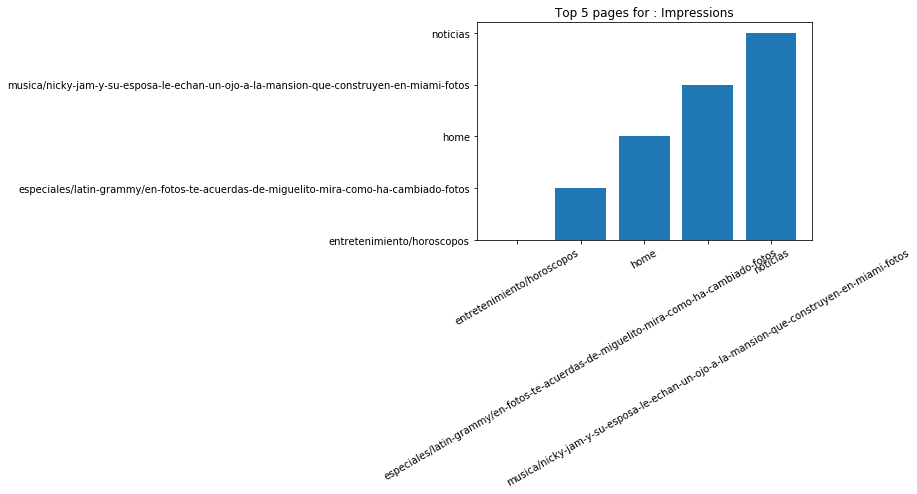

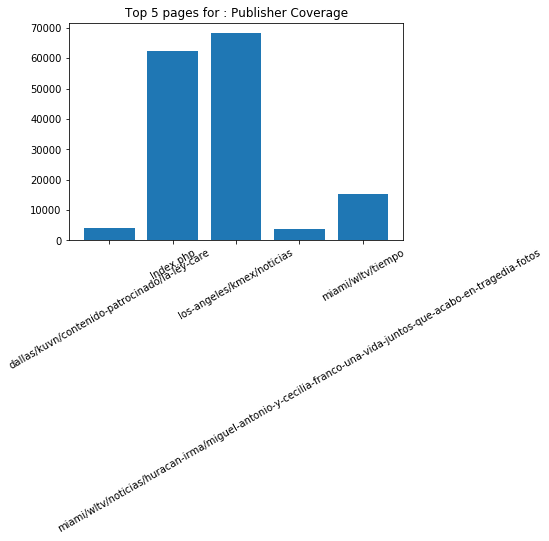

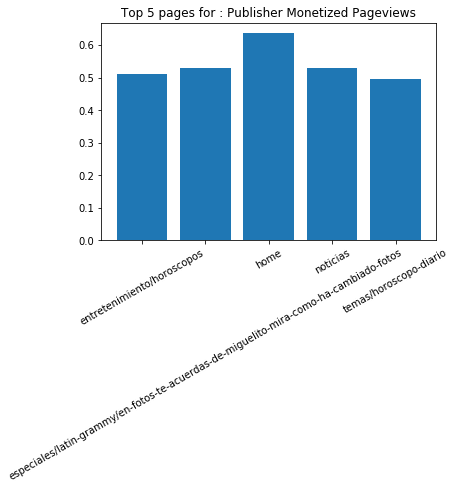

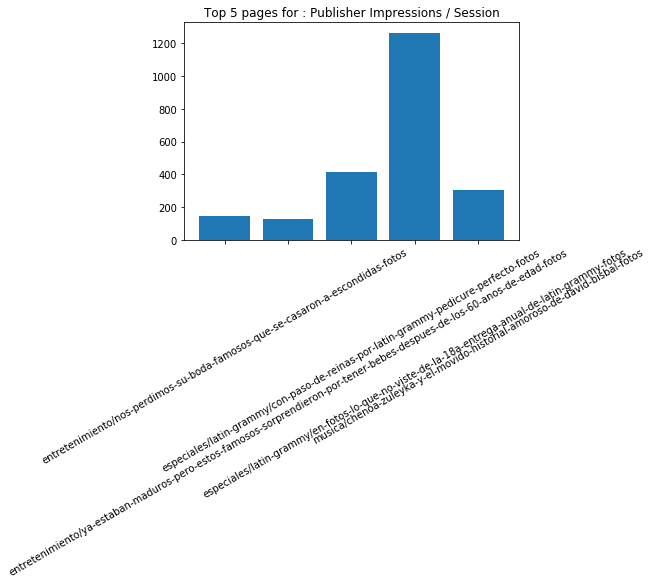

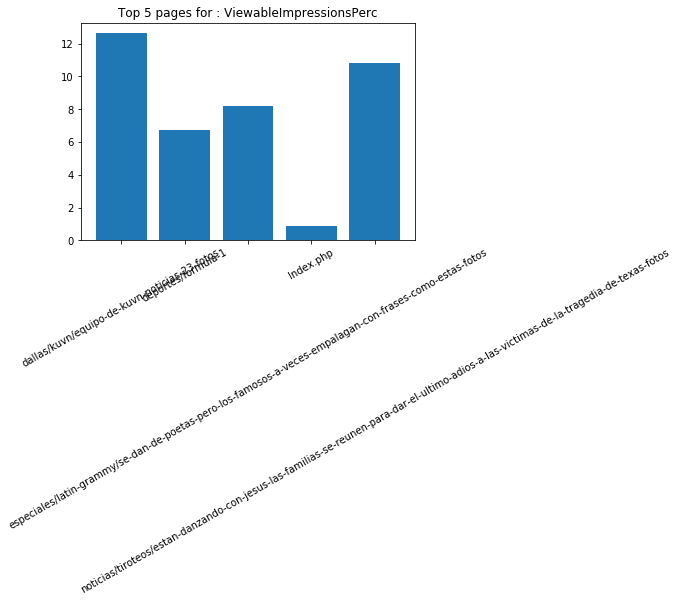

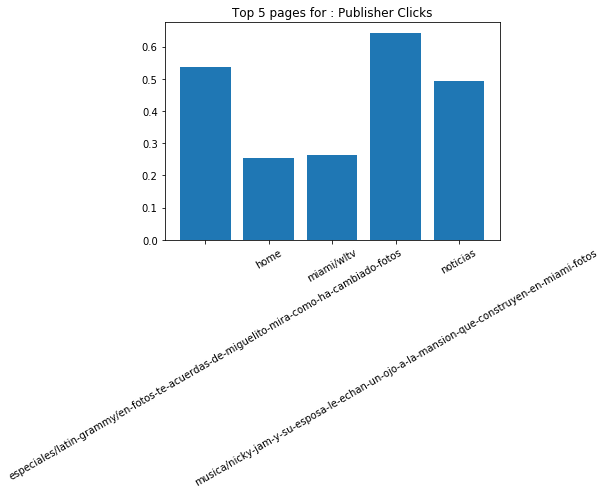

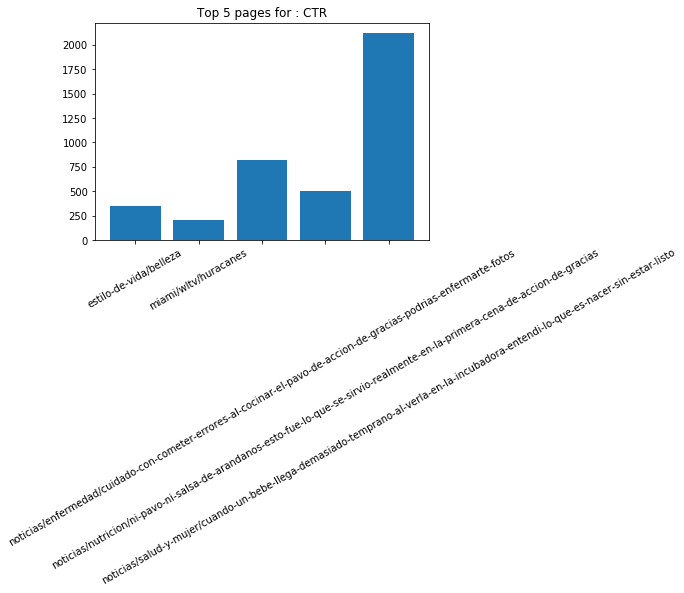

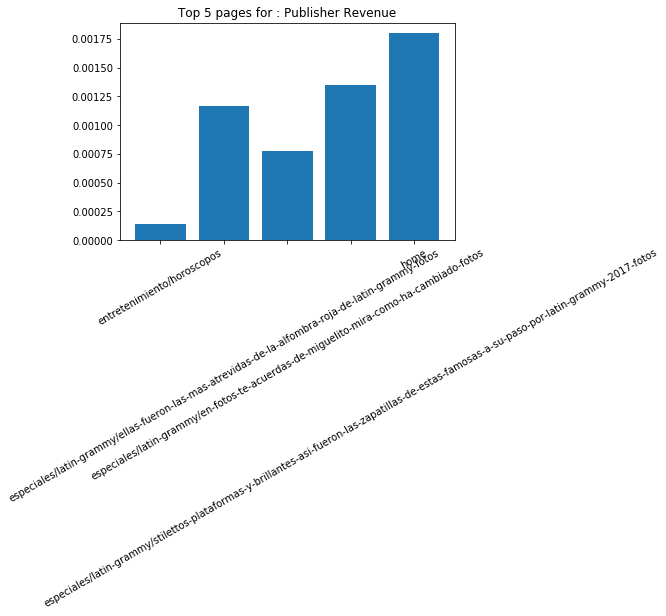

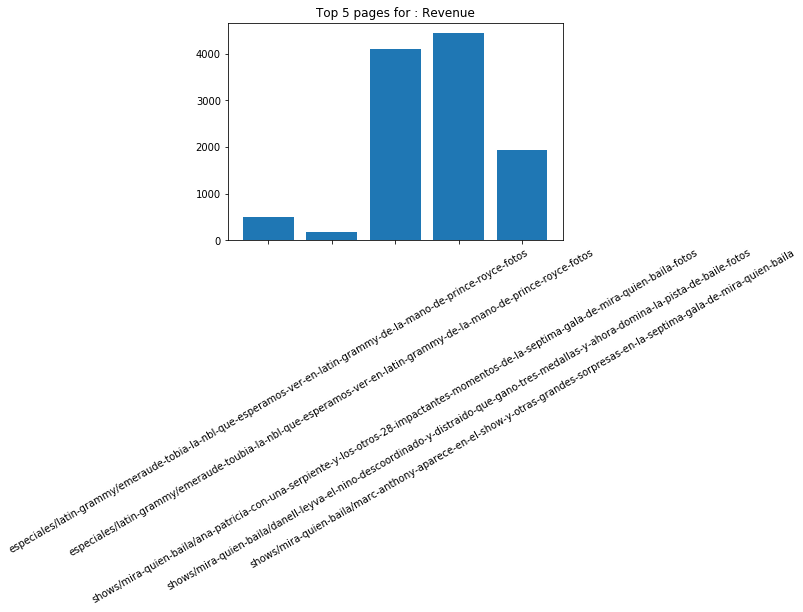

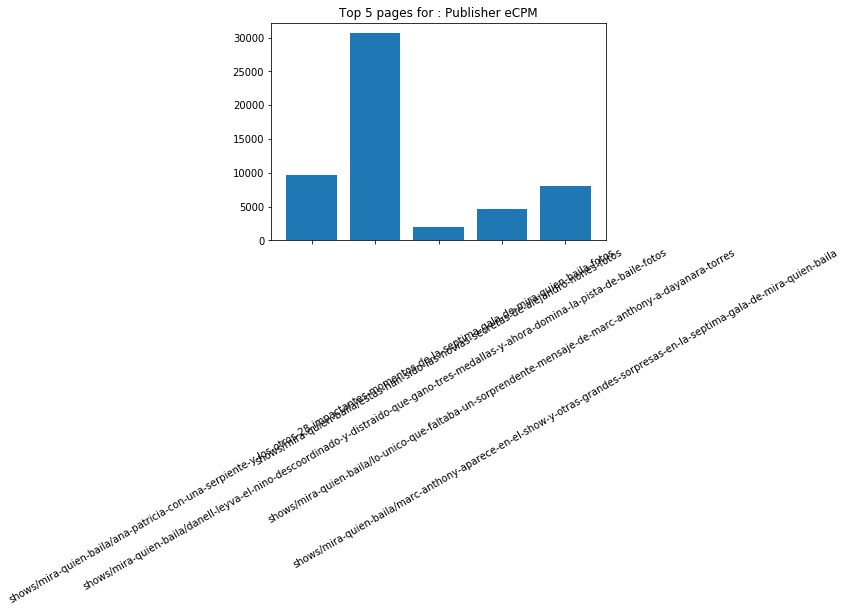

In [61]:
#.... Plot for top 5 pages .....

for j in range( len( varnames ) - 1 ):
    top_5_pages_df = master.sort_values( varnames[ j + 1 ], ascending = False ).head()   #.... sorting and taking top 5 pages
    plt.bar( top_5_pages_df.Page, top_5_pages_df.iloc[:, j ] )
    plt.title( 'Top 5 pages for : ' + varnames[ j + 1 ] )
    plt.xticks( rotation = 30 )
    plt.show()



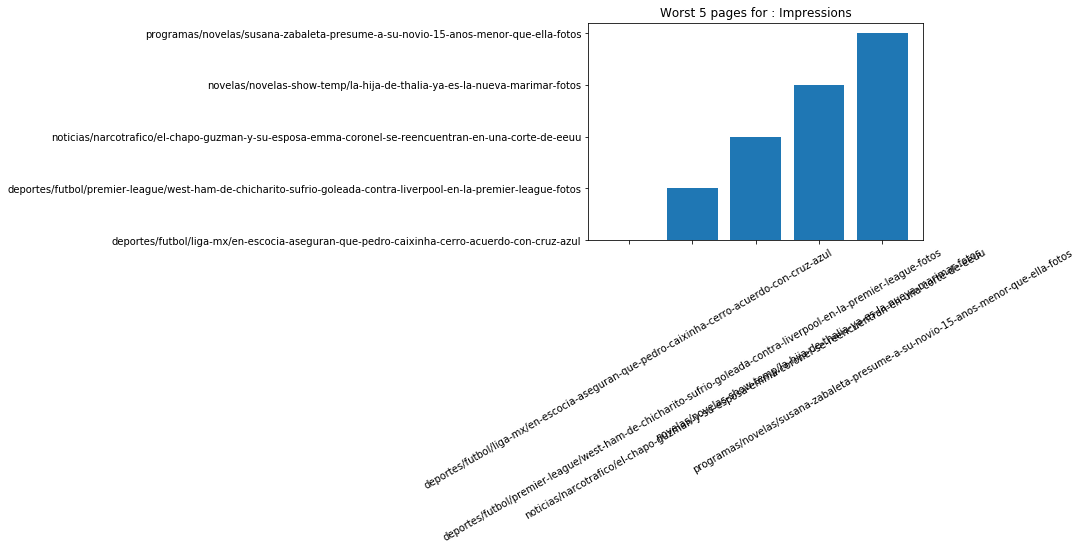

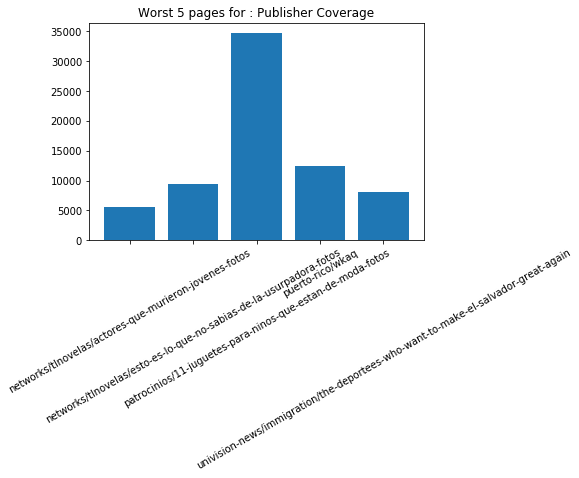

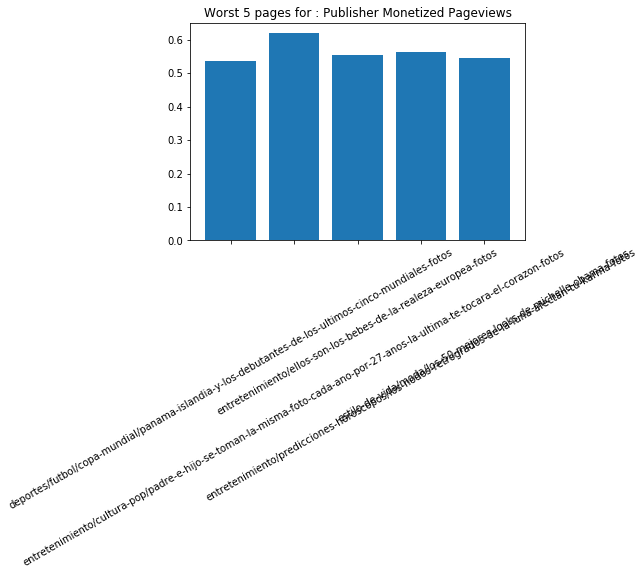

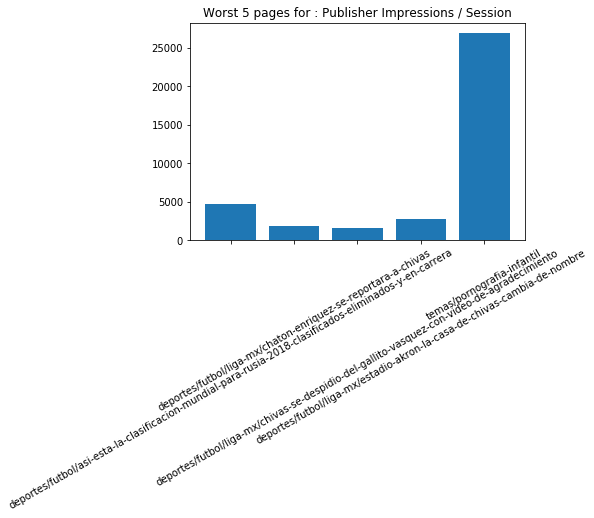

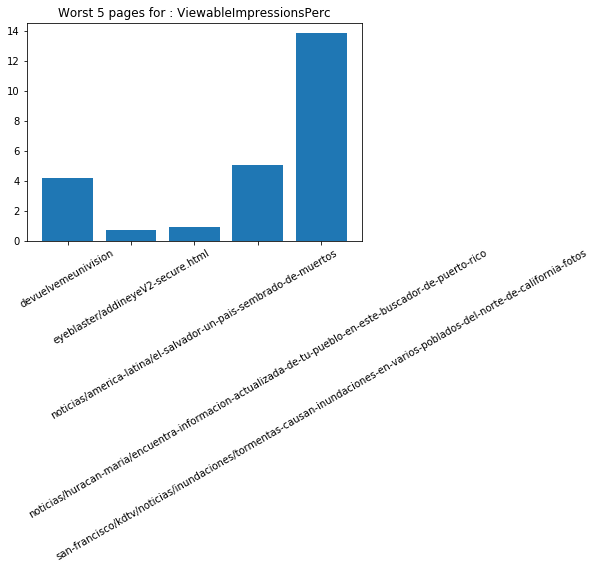

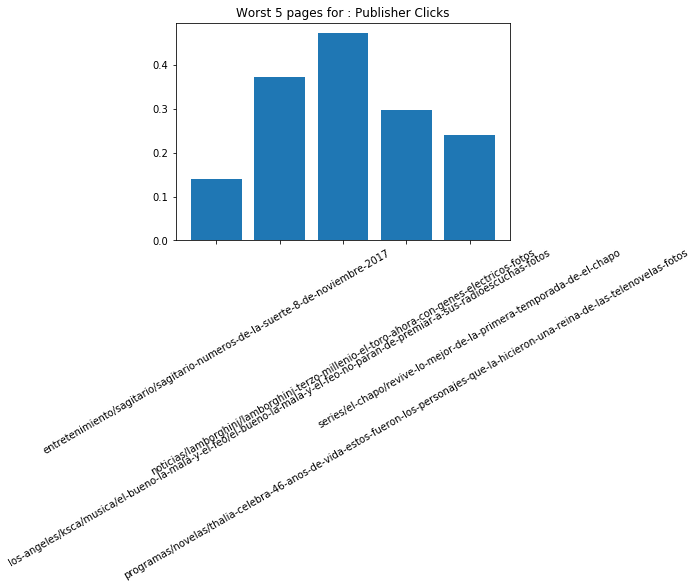

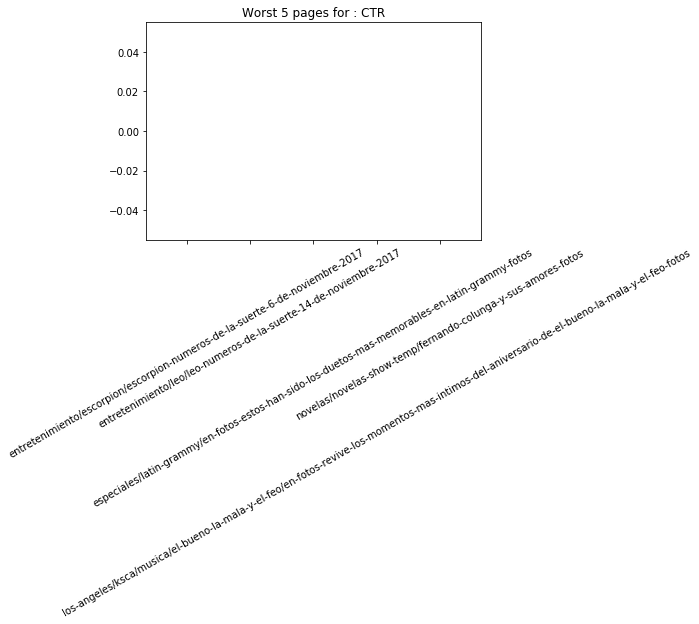

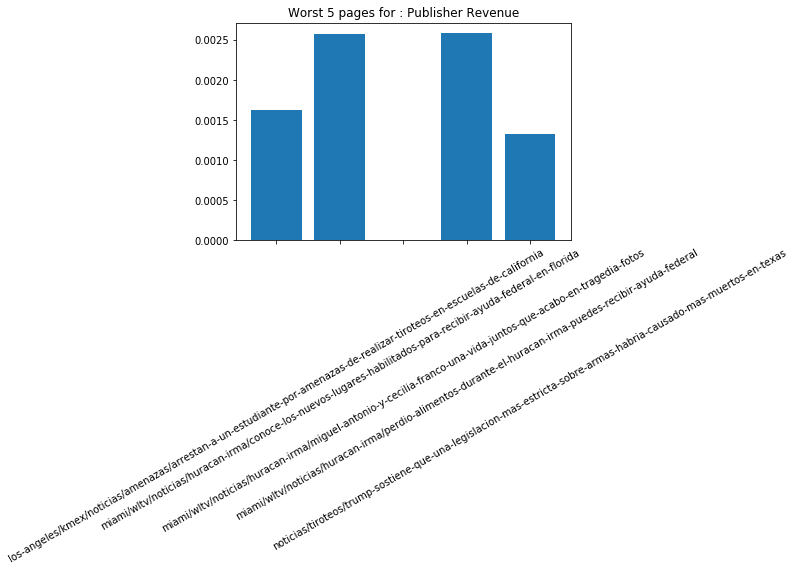

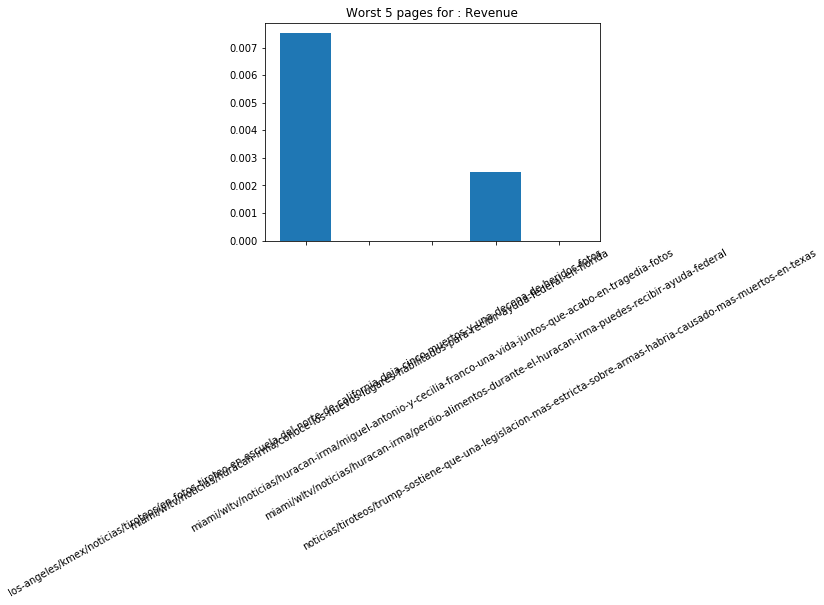

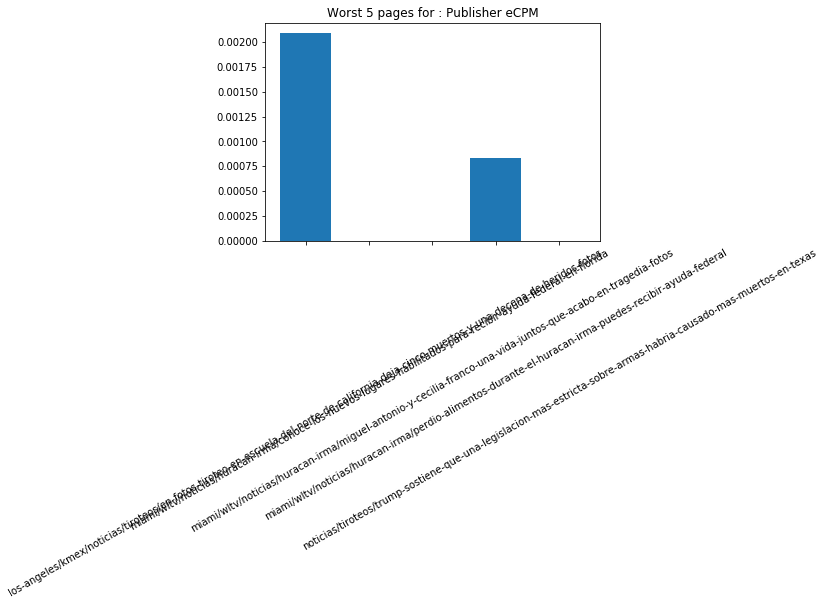

In [62]:
#.... Plot for worst 5 pages .....

for j in range( len( varnames ) - 1 ):
    worst_5_pages_df = master.sort_values( varnames[ j + 1 ], ascending = True ).head()   #.... sorting and taking worst 5 pages
    plt.bar( worst_5_pages_df.Page, worst_5_pages_df.iloc[:, j ] )
    plt.title( 'Worst 5 pages for : ' + varnames[ j + 1 ] )
    plt.xticks( rotation = 30 )
    plt.show()


In [63]:
#.... 

horoscope_list = [ "acuario", "piscis", "aries", "tauro", "geminis", "cancer", "leo", "virgo", "libra", "escorpion", "sagitario", "capricornio", "predicciones horoscopo", "predicciones ano nuevo", "horoscopo chino", "horoscopos-cancer", "horoscopo-diario", "predicciones-horoscopos", "horoscopo-chino" ]


In [64]:
#..... Initializing variables ......
                                 
topic_blank_indicator = [] ; topic_list = [] ; subtopic_list = [] ; c_list = [] ; d_list = [] ; e_list = [] ; f_list = [] ; g_list = []

for k in range( len( master ) ):
    page_input_list = master.Page[k].split('/')   #.... Splitting into "topic", "subtopic", "c", "d", "e", "f", "g"
    current_topic = page_input_list[0]
    topic_blank_indicator.append( current_topic != '' )   #..... if topic is blank storing False else True ... will be used for filtering rows
    current_topic_sp_char_removed = re.sub( '[^A-Za-z0-9]+', '', current_topic )   #.... Remove special character from topic, for example, if sara+marcos, we get sara marcos
    current_topic_extra_ws_removed = ' '.join(current_topic_sp_char_removed.split())   #.... Removing any extra white space, for example, if sara  marcos, we get sara marcos
    current_topic_further_formatted = re.sub( '(\\w\\w)\\W+\\w\\W+(\\w\\w)', '\\1 \\2', current_topic_extra_ws_removed )   #... Again but for cases where we have, for examemple ana c. alanis, we get ana alanis 
    current_topic_final = 'deportes' if current_topic_further_formatted == 'es' else current_topic_further_formatted  #.... More cleanning 
    current_subtopic = page_input_list[1] if len(page_input_list) >= 2 else 'null'
    current_subtopic_final = 'horoscopo' if current_subtopic in horoscope_list else current_subtopic
    topic_list.append( current_topic_final if len(page_input_list) >= 1 else 'null' )   #.... appending topic with current topic value
    subtopic_list.append( current_subtopic_final if len(page_input_list) >= 2 else 'null' )   #.... appending topic with current subtopic value
    c_list.append( page_input_list[2] if len(page_input_list) >= 3 else 'null' )   #.... appending c with current c value
    d_list.append( page_input_list[3] if len(page_input_list) >= 4 else 'null' )   #.... appending d with current d value
    e_list.append( page_input_list[4] if len(page_input_list) >= 5 else 'null' )   #.... appending e with current e value
    f_list.append( page_input_list[5] if len(page_input_list) >= 6 else 'null' )   #.... appending f with current f value
    g_list.append( page_input_list[6] if len(page_input_list) >= 7 else 'null' )   #.... appending g with current g value


In [65]:
master['topic'] = topic_list ; master['subtopic'] = subtopic_list ; master['c'] = c_list ; master['d'] = d_list ; master['e'] = e_list ; master['f'] = f_list ; master['g'] = g_list


In [66]:
mastertopic_0 = master[ topic_blank_indicator ]


In [67]:
mastertopic = mastertopic_0.sort_values( 'topic', ascending = True ).reset_index()   #.... Ordening topics by A-Z order


In [68]:
temp = [ mastertopic.topic[0] ]


In [69]:
for t in range( len( mastertopic ) - 1 ):
    indicator = mastertopic.topic[t] in mastertopic.topic[t+1]    #.... checking if change is needed
    if indicator:
        temp.append( mastertopic.topic[t] )
    else:
        temp.append( mastertopic.topic[t+1] )


In [70]:
mastertopic['topic'] = temp


In [71]:
#.... We see create a vector of cities

cities = [ "atlanta","arizona","austin","chicago","dallas","fresno","houston","las vegas", "los angeles","miami","north carolina","nueva york", "puerto rico", "sacramento", "san antonio","san diego","san francisco", "san francsico","philadelphia" ]


In [72]:
#.... We duplicate variable topics, for city

mastertopic['city'] = mastertopic.topic


In [73]:
#..... Putting c and d for topic and subtopics based on conditions

mastertopic[ 'topic' ] = [ mastertopic.c[i] if mastertopic.city[i] in cities else mastertopic.topic[i] for i in range( len( mastertopic ) ) ]

mastertopic[ 'subtopic' ] = [ mastertopic.d[i] if mastertopic.city[i] in cities else mastertopic.subtopic[i] for i in range( len( mastertopic ) ) ]


In [75]:
mastertopic

,index,Page,Impressions,Publisher Coverage,Publisher Monetized Pageviews,Publisher Impressions / Session,ViewableImpressionsPerc,Publisher Clicks,CTR,Publisher Revenue,Revenue,Publisher eCPM,topic,subtopic,c,d,e,f,g,city
0,3432,arizona/ktvw/noticias/inmigracion/lo-que-piens...,7235,0.684459,2408,3.306673,0.322070,21,0.002903,31.236077,14.276086,4.317357,noticias,inmigracion,noticias,inmigracion,lo-que-piensan-los-deportados-criminalizados-p...,null,null,arizona
1,2535,arizona/ktvw/noticias/inmigracion/un-dia-en-el...,12862,0.684517,3056,8.963066,0.443317,24,0.001866,66.506137,46.345740,5.170746,noticias,inmigracion,noticias,inmigracion,un-dia-en-el-comedor-de-los-deportados-el-luga...,null,null,arizona
2,1181,arizona/ktvw/noticias/arrestos/arrestan-en-ari...,54183,0.651134,20071,2.815433,0.315768,62,0.001144,186.166433,9.673496,3.435883,noticias,arrestos,noticias,arrestos,arrestan-en-arizona-a-un-exfutbolista-guatemal...,null,null,arizona
3,1698,arizona/ktvw/noticias/inmigracion/procesan-cri...,28012,0.668156,8702,3.534637,0.378821,45,0.001606,99.337413,12.534689,3.546245,noticias,inmigracion,noticias,inmigracion,procesan-criminalmente-a-unos-200-inmigrantes-...,null,null,arizona
4,850,arizona/ktvw/noticias/policia/policia-de-arizo...,93150,0.691061,20121,4.965087,0.478900,161,0.001728,384.930526,20.517591,4.132373,noticias,policia,noticias,policia,policia-de-arizona-es-despedida-y-tres-renunci...,null,null,arizona
5,2064,arizona/la-leyenda-de-jesus-malverde-santo-de-...,19220,0.615804,4442,4.191930,0.360149,25,0.001301,27.257361,5.944899,1.418177,null,null,null,null,null,null,null,arizona
6,3034,arizona/ktvw/noticias,9237,0.546751,3476,4.688832,0.431353,28,0.003031,51.793358,26.291045,5.607162,noticias,null,noticias,null,null,null,null,arizona
7,3042,arizona/ktvw/noticias/politica/arpaio-pregunta...,9190,0.690328,2118,16.678766,0.503692,33,0.003591,45.978674,83.445869,5.003120,noticias,politica,noticias,politica,arpaio-pregunta-a-sus-seguidores-si-debe-prese...,null,null,arizona
8,4881,arizona/kqmr,3922,0.363542,2194,2.247564,0.511785,13,0.003315,27.865358,15.968687,7.104885,null,null,null,null,null,null,null,arizona
9,4283,arizona/ktvw/noticias/inmigracion/procesan-cri...,5062,0.688536,1202,15.527607,0.474671,7,0.001383,19.809041,60.763929,3.913283,noticias,inmigracion,noticias,inmigracion,procesan-criminalmente-a-inmigrantes-que-entra...,null,null,arizona


In [76]:
#.... Cleaning ....

#... We filter where colum topic is empty, because there is not article link

mastertopic = mastertopic[ mastertopic.topic != '' ]


In [77]:
#... Remove special character, for example, if sara+marcos, we get sara marcos

mastertopic[ 'topic' ] = [ re.sub( '[^a-zA-Z\\s]', ' ', mastertopic.topic[i] ) for i in range( len( mastertopic ) ) ]


In [78]:
#... Removing any extra white space, for example, if sara  marcos, we get sara marcos

mastertopic[ 'topic' ] = [ ' '.join( mastertopic.topic[i].split() ) for i in range( len( mastertopic ) ) ]


In [79]:
#... Again but for cases where we have, for examemple ana c. alanis, we get ana alanis

mastertopic[ 'topic' ] = [ re.sub( '(\\w\\w)\\W+\\w\\W+(\\w\\w)', '\\1 \\2', mastertopic.topic[i] ) for i in range( len( mastertopic ) ) ]


In [80]:
#... Ordening topics by A-Z order

mastertopic = mastertopic.sort_values( 'topic', ascending = True ).reset_index()


In [81]:
mastertopic

,level_0,index,Page,Impressions,Publisher Coverage,Publisher Monetized Pageviews,Publisher Impressions / Session,ViewableImpressionsPerc,Publisher Clicks,CTR,...,Revenue,Publisher eCPM,topic,subtopic,c,d,e,f,g,city
0,46,3713,chicago/wgbo/actividades-del-dia-de-los-muerto...,6396,0.552459,582,26.000000,0.540006,1,0.000156,...,101.016935,3.885267,actividades del dia de los muertos conciertos ...,null,actividades-del-dia-de-los-muertos-conciertos-...,null,null,null,null,chicago
1,57,4813,chicago/wgbo/altar-de-muertos-una-tradicion-mu...,4031,0.524716,366,17.526087,0.539896,0,0.000000,...,73.989822,4.221697,altar de muertos una tradicion muy viva en la ...,null,altar-de-muertos-una-tradicion-muy-viva-en-la-...,null,null,null,null,chicago
2,77,2725,chicago/wgbo/alumbrado-navideno-apertura-de-la...,11384,0.543225,1143,11.760331,0.683943,13,0.001142,...,72.784496,6.188984,alumbrado navideno apertura de la pista de hie...,null,alumbrado-navideno-apertura-de-la-pista-de-hie...,null,null,null,null,chicago
3,47,3038,chicago/wgbo/alumbrado-navideno-apertura-de-la...,9212,0.545293,1369,7.893745,0.761234,18,0.001954,...,58.516103,7.412971,alumbrado navideno apertura de la pista de hie...,null,alumbrado-navideno-apertura-de-la-pista-de-hie...,null,null,null,null,chicago
4,2517,1415,houston/kxln/asi-es-el-recorrido-por-el-festiv...,39499,0.552370,2868,14.683643,0.499106,177,0.004481,...,109.394740,7.450109,asi es el recorrido por el festival de luces n...,null,asi-es-el-recorrido-por-el-festival-de-luces-n...,null,null,null,null,houston
5,40,1810,capitulos-de-television/novelas,24923,0.491864,9123,36.330904,0.312537,46,0.001846,...,196.122790,5.398236,capitulosdetelevision,novelas,null,null,null,null,null,capitulosdetelevision
6,85,3237,comunidad,8066,0.343960,9864,3.238057,0.770648,74,0.009174,...,17.097446,5.280156,comunidad,null,null,null,null,null,null,comunidad
7,51,3927,chicago/wgbo/conciertos-desfiles-y-muchos-even...,5832,0.555658,512,13.690141,0.662696,7,0.001200,...,70.217138,5.129030,conciertos desfiles muchos eventos de accion d...,null,conciertos-desfiles-y-muchos-eventos-de-accion...,null,null,null,null,chicago
8,83,4463,chicago/wgbo/conciertos-festivales-ideas-week-...,4696,0.554973,342,18.709163,0.521358,0,0.000000,...,64.300255,3.436832,conciertos festivales ideas week mucho hallowe...,null,conciertos-festivales-ideas-week-y-mucho-hallo...,null,null,null,null,chicago
9,53,4825,chicago/wgbo/conciertos-superheroes-y-hasta-ca...,4007,0.537096,482,16.092369,0.574910,0,0.000000,...,79.240096,4.924079,conciertos superheroes hasta carrera de los mu...,null,conciertos-superheroes-y-hasta-carrera-de-los-...,null,null,null,null,chicago


In [82]:
#... Looking for similarity
#... If in row 1 we have sara marcos and row 2 we have sara marcos p. They are similar
#... If they are similar, row 2 sara marcos p is now sara marcos

temp = [ mastertopic.topic[0] ]

for t in range( len( mastertopic ) - 1 ):
    indicator = mastertopic.topic[t] in mastertopic.topic[t+1]    #.... checking if change is needed
    if indicator:
        temp.append( mastertopic.topic[t] )
    else:
        temp.append( mastertopic.topic[t+1] )
        
mastertopic['topic'] = temp

In [83]:
#.... Topic Freq ...

topicmaster = mastertopic.topic.value_counts().to_frame().reset_index()
topicmaster.rename( columns={'index': 'topic', 'topic': 'Freq'}, inplace=True )    #.... renaming columns
topicmaster = topicmaster.sort_values( 'Freq', ascending = False ).reset_index()
topicmaster['Percentage'] = 100*topicmaster.Freq/topicmaster.Freq.sum()   #.... adding Percentage column


In [85]:
#... We clean again
#... We filter where colum subtopic is empty, because there is not article link

mastertopic = mastertopic[ mastertopic.subtopic != '' ]


In [86]:
#... Remove special character, for example, if sara+marcos, we get sara marcos

mastertopic[ 'subtopic' ] = [ re.sub( '[^a-zA-Z\\s]', ' ', mastertopic.subtopic[i] ) for i in range( len( mastertopic ) ) ]


In [87]:
#... Removing any extra white space, for example, if sara  marcos, we get sara marcos

mastertopic[ 'subtopic' ] = [ ' '.join( mastertopic.subtopic[i].split() ) for i in range( len( mastertopic ) ) ]


In [88]:
#... Again but for cases where we have, for examemple ana c. alanis, we get ana alanis

mastertopic[ 'subtopic' ] = [ re.sub( '(\\w\\w)\\W+\\w\\W+(\\w\\w)', '\\1 \\2', mastertopic.subtopic[i] ) for i in range( len( mastertopic ) ) ]


In [89]:
#... Ordening topics by A-Z order

mastertopic = mastertopic.sort_values( 'subtopic', ascending = True ).reset_index()


ValueError: cannot insert level_0, already exists

In [90]:
#... Looking for similarity
#... If in row 1 we have sara marcos and row 2 we have sara marcos p. They are similar
#... If they are similar, row 2 sara marcos p is now sara marcos

temp = [ mastertopic.subtopic[0] ]

for t in range( len( mastertopic ) - 1 ):
    indicator = mastertopic.subtopic[t] in mastertopic.subtopic[t+1]    #.... checking if change is needed
    if indicator:
        temp.append( mastertopic.subtopic[t] )
    else:
        temp.append( mastertopic.subtopic[t+1] )

mastertopic['subtopic'] = temp


In [91]:
#.... Subtopic Freq ...

subtopicmaster = mastertopic.subtopic.value_counts().to_frame().reset_index()
subtopicmaster.rename( columns={'index': 'subtopic', 'subtopic': 'Freq'}, inplace=True )
subtopicmaster['Percentage'] = 100*subtopicmaster.Freq/subtopicmaster.Freq.sum()   #.... adding Percentage column


In [94]:
#.... We get the mean for each variable per topic per post

columns_0 = [ 'topic', 'Impressions', 'Publisher Coverage', 'Publisher Monetized Pageviews', 'Publisher Impressions / Session', 'ViewableImpressionsPerc', 'Publisher Clicks', 'CTR', 'Publisher Revenue', 'Revenue', 'Publisher eCPM', ]

topicsdf_0 = pd.DataFrame( mastertopic, columns = columns_0 )

topicsdf = topicsdf_0.groupby('topic').mean().reset_index()


In [95]:
#.... We do correlation matrix between the variables

matrixcortopics = topicsdf[ topicsdf.columns.difference( ['topic'] ) ].corr()    #.... correlation matrix

matrixcortopics

varnamestopics = topicsdf.columns.values   #.... We get the names of our variables


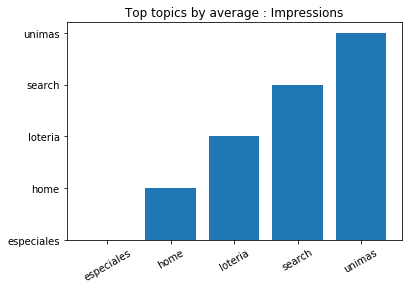

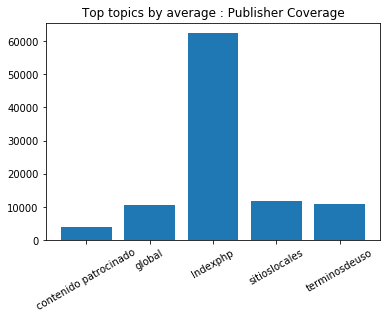

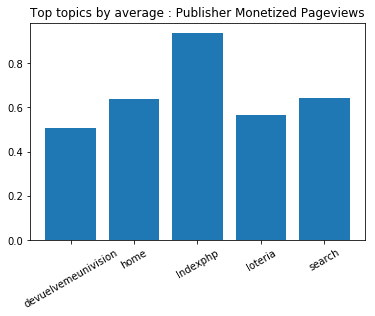

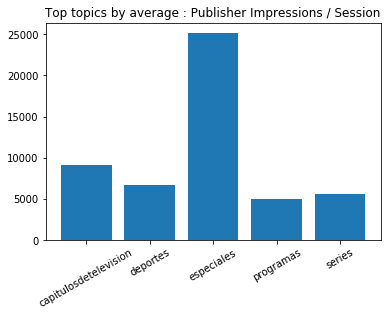

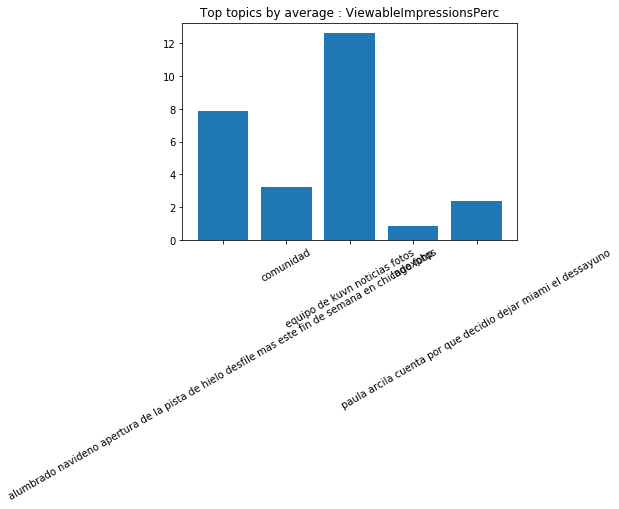

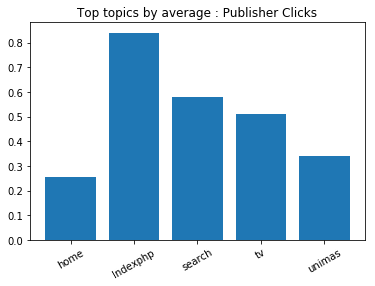

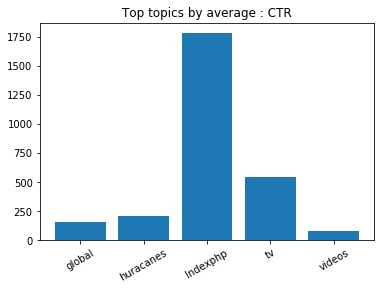

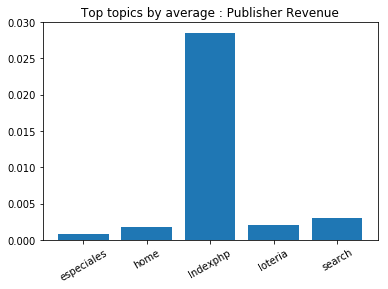

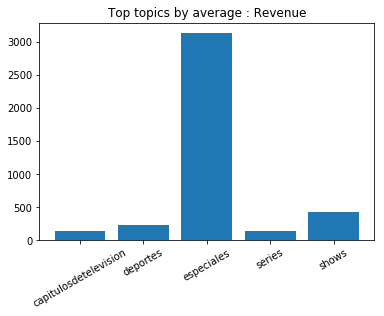

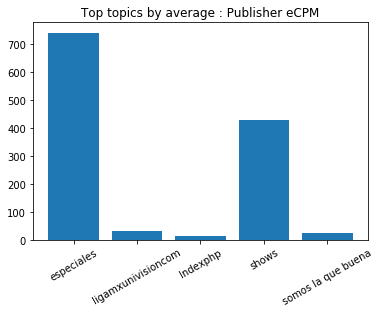

In [96]:
#.... We will do a for loop to get the top five topics pages for every variable .....

for j in range( len( varnamestopics ) - 1 ):
    top_5_topic_df = topicsdf.sort_values( varnamestopics[ j + 1 ], ascending = False ).head()
    plt.bar( top_5_topic_df.topic, top_5_topic_df.iloc[:, j ] )
    plt.title( 'Top topics by average : ' + varnamestopics[ j + 1 ] )
    plt.xticks( rotation = 30 )
    plt.show()


In [97]:
#... For topics, in %

#... We will do a for loop to get the cumulative topics  for every variable

for i in range( len( topicsdf.columns ) - 1 ):
  auxmaster = topicsdf.sort_values( varnamestopics[ i+1 ], ascending = False )   #.... We order the type for bigger to smaller.Top fives
  current_column = auxmaster.iloc[ :, i+1 ]
  current_column_percent = 100*( current_column/current_column.sum() )  #... We get the percentage
  current_column_cumsum = current_column_percent.cumsum()
  auxmastert = topicsdf.sort_values( varnamestopics[ i+1 ], ascending = False ).iloc[ :, 0 ]  #... We get the first five topics, only names
  auxmaster = pd.concat( [auxmastert, current_column_cumsum], axis = 1, keys = ['topic', 'aux'] )   #.... We join and convert in data frame
  

In [98]:
####################
#Regression
#We remove that column we dont have interest
columns = ['c','d','e','f','g','city']
mastertopic.drop(columns, inplace=True, axis=1)
#pprint.pprint(mastertopic)



In [99]:
#To do the regression, we will use the variables with higher correlation acording to cormatrix
#Except profit, because we get profit using revenue

X = mastertopic[['Publisher Impressions / Session','Publisher Clicks']]
y = mastertopic[['Publisher Revenue']]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Publisher Revenue   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     983.3
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:45:53   Log-Likelihood:                -48382.
No. Observations:                5000   AIC:                         9.677e+04
Df Residuals:                    4998   BIC:                         9.678e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Publisher 

In [100]:
#Another regression
mastertopics = (mastertopic.loc[mastertopic['topic'].isin(['especiales', 'entretenimiento', 'programas', 'musica', 'series', 'shows'])])

model = sm.ols(formula= 'Revenue~Impressions+topic', data=mastertopics)
fitted = model.fit()      #.... fitting model
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     28.47
Date:                Fri, 02 Mar 2018   Prob (F-statistic):           3.81e-33
Time:                        19:47:15   Log-Likelihood:                -21291.
No. Observations:                2632   AIC:                         4.260e+04
Df Residuals:                    2625   BIC:                         4.264e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              60.0084    

In [101]:
#Metrics
#Impressions
Impressions = mastertopic.groupby(by = ['topic'])['Impressions'].mean().reset_index()
Impressions_subtopic = mastertopic.groupby(by = ['topic','subtopic'])['Impressions'].mean().reset_index()

ImpressionsforEntretenimiento = (Impressions.loc[Impressions['topic'].isin(['entretenimiento'])])
ImpressionsforNoticias = (Impressions.loc[Impressions['topic'].isin(['noticias'])])
ImpressionsforDeportes = (Impressions.loc[Impressions['topic'].isin(['deportes'])])
ImpressionsforEspeciales = (Impressions.loc[Impressions['topic'].isin(['especiales'])])

Impressions = pd.concat([ImpressionsforEntretenimiento,ImpressionsforNoticias,ImpressionsforDeportes,ImpressionsforEspeciales])

Impressions.Impressions = round( Impressions.Impressions, 2 )

Impressions['Percentage'] = round( 100*Impressions.Impressions/Impressions.Impressions.sum(), 2 )



In [102]:
#Viewable ViewableImpressionsPerc %
ViewableImpressionsPerc = mastertopic.groupby(by = ['topic'])['ViewableImpressionsPerc'].mean().reset_index()
pprint.pprint(ViewableImpressionsPerc)
ViewableImpressionsPerc_subtopic = mastertopic.groupby(by = ['topic','subtopic'])['ViewableImpressionsPerc'].mean().reset_index()
pprint.pprint(ViewableImpressionsPerc_subtopic)

ViewableImpressionsPercforEntretenimiento = (ViewableImpressionsPerc.loc[ViewableImpressionsPerc['topic'].isin(['entretenimiento'])])
ViewableImpressionsPercforNoticias = (ViewableImpressionsPerc.loc[ViewableImpressionsPerc['topic'].isin(['noticias'])])
ViewableImpressionsPercforDeportes = (ViewableImpressionsPerc.loc[ViewableImpressionsPerc['topic'].isin(['deportes'])])
ViewableImpressionsPercforEspeciales = (ViewableImpressionsPerc.loc[ViewableImpressionsPerc['topic'].isin(['especiales'])])

ViewableImpressionsPerc = pd.concat([ViewableImpressionsPercforEntretenimiento,ViewableImpressionsPercforNoticias,ViewableImpressionsPercforDeportes,ViewableImpressionsPercforEspeciales])



                                                topic  ViewableImpressionsPerc
0   actividades del dia de los muertos conciertos ...                 0.540006
1   altar de muertos una tradicion muy viva en la ...                 0.539896
2   alumbrado navideno apertura de la pista de hie...                 0.683943
3   alumbrado navideno apertura de la pista de hie...                 0.761234
4   asi es el recorrido por el festival de luces n...                 0.499106
5                               capitulosdetelevision                 0.312537
6                                           comunidad                 0.770648
7   conciertos desfiles muchos eventos de accion d...                 0.662696
8   conciertos festivales ideas week mucho hallowe...                 0.521358
9   conciertos superheroes hasta carrera de los mu...                 0.574910
10                                contactanos en amor                 0.505079
11                              contenido patrocinad

In [103]:
#Viewable CTR %
CTR = mastertopic.groupby(by = ['topic'])['CTR'].mean().reset_index()
CTR_subtopic = mastertopic.groupby(by = ['topic','subtopic'])['CTR'].mean().reset_index()

CTRforEntretenimiento = (CTR.loc[CTR['topic'].isin(['entretenimiento'])])
CTRforNoticias = (CTR.loc[CTR['topic'].isin(['noticias'])])
CTRforDeportes = (CTR.loc[CTR['topic'].isin(['deportes'])])
CTRforEspeciales = (CTR.loc[CTR['topic'].isin(['especiales'])])

CTR = pd.concat([CTRforEntretenimiento,CTRforNoticias,CTRforDeportes,CTRforEspeciales])


In [104]:
#Viewable Revenue
Revenue = mastertopic.groupby(by = ['topic'])['Revenue'].mean().reset_index()
Revenue_subtopic = mastertopic.groupby(by = ['topic','subtopic'])['Revenue'].mean().reset_index()

RevenueforEntretenimiento = (Revenue.loc[Revenue['topic'].isin(['entretenimiento'])])
RevenueforNoticias = (Revenue.loc[Revenue['topic'].isin(['noticias'])])
RevenueforDeportes = (Revenue.loc[Revenue['topic'].isin(['deportes'])])
RevenueforEspeciales = (Revenue.loc[Revenue['topic'].isin(['especiales'])])

Revenue = pd.concat([RevenueforEntretenimiento,RevenueforNoticias,RevenueforDeportes,RevenueforEspeciales])

Revenue.Revenue = round( Revenue.Revenue, 2 )

Revenue['Percentage'] = round( 100*Revenue.Revenue/Revenue.Revenue.sum(), 2 )

pprint.pprint(Revenue)  
  

              topic  Revenue  Percentage
16  entretenimiento    57.44        4.89
41         noticias    45.11        3.84
12         deportes   331.98       28.29
18       especiales   739.07       62.97
